In [1]:
%matplotlib inline
import pandas
import pylab
import pytry
import seaborn

First, we load the data.  This may take a long time....

In [2]:
data = pytry.read('data')

loading 0...
loading 50...
loading 100...
loading 150...
loading 200...
loading 250...
loading 300...
loading 350...
loading 400...
loading 450...
loading 500...
loading 550...
loading 600...
loading 650...
loading 700...
loading 750...
loading 800...
loading 850...
loading 900...
loading 950...
loading 1000...
loading 1050...
loading 1100...
loading 1150...
loading 1200...
loading 1250...
loading 1300...
loading 1350...
loading 1400...
loading 1450...
loading 1500...
loading 1550...
loading 1600...
loading 1650...
loading 1700...
loading 1750...
loading 1800...
loading 1850...
loading 1900...
loading 1950...
loading 2000...
loading 2050...
loading 2100...
loading 2150...
loading 2200...
loading 2250...
loading 2300...
loading 2350...
loading 2400...
loading 2450...
loading 2500...
loading 2550...
loading 2600...
loading 2650...
loading 2700...
loading 2750...
loading 2800...
loading 2850...
loading 2900...
loading 2950...
loading 3000...
loading 3050...
loading 3100...
loading 3150...

In [19]:
old_data = pytry.read('old_data')

loading 0...
loading 50...
loading 100...
loading 150...
loading 200...
loading 250...
loading 300...
loading 350...
loading 400...
loading 450...
loading 500...
loading 550...
loading 600...
loading 650...
loading 700...
loading 750...
loading 800...
loading 850...
loading 900...
loading 950...
loading 1000...
loading 1050...
loading 1100...
loading 1150...
loading 1200...
loading 1250...
loading 1300...
loading 1350...
loading 1400...
loading 1450...
loading 1500...
loading 1550...
loading 1600...
loading 1650...
loading 1700...
loading 1750...
loading 1800...
loading 1850...
loading 1900...
loading 1950...
loading 2000...
loading 2050...
loading 2100...
loading 2150...
loading 2200...
loading 2250...
loading 2300...
loading 2350...
loading 2400...
loading 2450...
loading 2500...
loading 2550...
loading 2600...
loading 2650...
loading 2700...
loading 2750...
loading 2800...
loading 2850...
loading 2900...
loading 2950...
loading 3000...
loading 3050...
loading 3100...
loading 3150...

Now convert it all into a useful pandas DataFrame

In [218]:
data2 = []
for i, d in enumerate(data+old_data):
    stay = d['stay_prob']
    for rewarded in [True, False]:
        for rare in [True, False]:
            d2 = dict(d)
            d2['rewarded']='+' if rewarded else '-'
            d2['rare']='R' if rare else 'C'
            d2['stay']=stay[rewarded,rare]
            
            d2['type']='%s%s' % ('R' if rare else 'C',
                                  '+' if rewarded else '-')
            data2.append(d2)
            d2.pop('history')
            d2.pop('rewards')
            d2.pop('stay_prob')
            if not d2.has_key('N_product'):
                d2['N_product'] = 200
            if not d2.has_key('syn'):
                d2['syn'] = 0.005
            if not d2.has_key('rate'):
                d2['rate'] = False
            
df = pandas.DataFrame(data2)            

/home/tcstewar/env/work/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


Now we specify what we want to plot.

In [326]:
figure = 7

if figure == 1:
    initial_query = 'N_product==200 and T_interval==0.05 and rate==False and syn==0.005 and env_seed==2'
    param = 'N_state_action'      # the parameter to vary
    name = 'neurons'              # a human-readable name for that parameter (for plot titles)
    vals = [100, 500, 750, 1000]  # the values to vary the parameter over
elif figure == 2:
    initial_query = 'N_state_action==500 and T_interval==0.05 and rate==False and syn==0.005 and env_seed==2'
    param = 'N_product'      # the parameter to vary
    name = 'product neurons'              # a human-readable name for that parameter (for plot titles)
    vals = [100, 200, 300, 500, 750, 1000]  # the values to vary the parameter over
elif figure == 3:
    initial_query = 'T_interval==0.05 and rate==True and N_state_action==500'
    param = 'alpha'      # the parameter to vary
    name = 'learning rate'              # a human-readable name for that parameter (for plot titles)
    vals = [ 0.05,  0.1,   0.3,   0.5,   0.7,   0.9,   1.  ]  # the values to vary the parameter over
elif figure == 4:
    initial_query = 'rate==True and T_interval==0.05 and seed==1 and alpha==0.3 and N_state_action==100'
    param = 'env_seed'      # the parameter to vary
    name = 'environment'              # a human-readable name for that parameter (for plot titles)
    vals = np.arange(1, 21)  # the values to vary the parameter over
elif figure == 5:
    initial_query = 'N_product==200 and N_state_action==500 and T_interval==0.05 and syn==0.005'
    param = 'seed'      # the parameter to vary
    name = 'nengo seed'              # a human-readable name for that parameter (for plot titles)
    vals = np.arange(1, 21)  # the values to vary the parameter over
elif figure == 6:
    initial_query = 'T_interval==0.05 and alpha==0.3 and n_intervals==20000 and direct==False and rate!=True and N_product==200 and syn==0.005 and env_seed in [2]'
    param = 'N_state_action'      # the parameter to vary
    name = 'neurons'              # a human-readable name for that parameter (for plot titles)
    vals = [  20,   50,   70,  100,  200,  500,  750, 1000]  # the values to vary the parameter over
elif figure == 7:
    initial_query = 'N_state_action==500 and alpha==0.3 and n_intervals==20000 and direct==False and rate!=True and N_product==200 and syn==0.005 and seed==1'
    param = 'T_interval'      # the parameter to vary
    name = 'interval'              # a human-readable name for that parameter (for plot titles)
    #vals = [ 0.04,  0.05,  0.09,  0.1,   0.2,   0.3,   0.4,   0.41,  0.45,  0.49,  0.5,   0.51, 0.6 ]  # the values to vary the parameter over
    vals = [ 0.05,  0.2, 0.49, 0.5,   0.51]  # the values to vary the parameter over
    

In [327]:
df2 = df.query(initial_query)
df2

,D,N_product,N_state_action,T_interval,alpha,backend,choice_noise,direct,dt,env_seed,n_intervals,neuron_type,rare,rate,rewarded,seed,stay,syn,type
1544,5,200,500,0.05,0.3,nengo,0.05,False,0.001,22.0,20000,default,R,False,+,1,0.511068,0.005,R+
1545,5,200,500,0.05,0.3,nengo,0.05,False,0.001,22.0,20000,default,C,False,+,1,0.738816,0.005,C+
1546,5,200,500,0.05,0.3,nengo,0.05,False,0.001,22.0,20000,default,R,False,-,1,0.680350,0.005,R-
1547,5,200,500,0.05,0.3,nengo,0.05,False,0.001,22.0,20000,default,C,False,-,1,0.441743,0.005,C-
4756,5,200,500,0.10,0.3,nengo,0.05,False,0.001,22.0,20000,default,R,False,+,1,0.472868,0.005,R+
4757,5,200,500,0.10,0.3,nengo,0.05,False,0.001,22.0,20000,default,C,False,+,1,0.722812,0.005,C+
4758,5,200,500,0.10,0.3,nengo,0.05,False,0.001,22.0,20000,default,R,False,-,1,0.762892,0.005,R-
4759,5,200,500,0.10,0.3,nengo,0.05,False,0.001,22.0,20000,default,C,False,-,1,0.504244,0.005,C-
6524,5,200,500,0.05,0.3,nengo,0.05,False,0.001,21.0,20000,default,R,False,+,1,0.510151,0.005,R+
6525,5,200,500,0.05,0.3,nengo,0.05,False,0.001,21.0,20000,default,C,False,+,1,0.736876,0.005,C+


In [328]:
df2 = df2.drop_duplicates()

In [329]:
import numpy as np
for k in df2.keys():
    if k != 'stay':
        print k, np.unique(getattr(df2, k))

D [5]
N_product [200]
N_state_action [500]
T_interval [ 0.04  0.05  0.09  0.1   0.2   0.3   0.4   0.41  0.45  0.49  0.5   0.51
  0.6 ]
alpha [ 0.3]
backend ['nengo']
choice_noise [ 0.05]
direct [False]
dt [ 0.001]
env_seed [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.]
n_intervals [20000]
neuron_type ['default']
rare ['C' 'R']
rate [False]
rewarded ['+' '-']
seed [1]
syn [ 0.005]
type ['C+' 'C-' 'R+' 'R-']


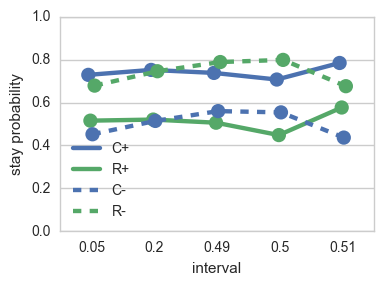

In [ ]:
seaborn.set_style("whitegrid")
pylab.figure(figsize=(4,3))

colors = seaborn.color_palette('deep', 2)
palette = {
    'C+': colors[0],
    'R+': colors[1],
    'C-': colors[0],
    'R-': colors[1],
}

seaborn.pointplot(x=param, y='stay', hue='type', data=df2, 
                  order=vals,
                  dodge=True,
                  hue_order=['C+', 'R+', 'C-', 'R-'], 
                  linestyles=['-','-','--','--'], 
                  palette=colors)
ax = pylab.gca()
pylab.legend(title='', loc='best', handles=ax.lines[::(len(vals)+1)], labels=['C+', 'R+', 'C-', 'R-'])
pylab.ylim(0,1)
pylab.xlabel(name)
pylab.ylabel('stay probability')
pylab.tight_layout()
pylab.savefig('%s.png' % param, dpi=450)
pylab.show()

N=22
T_interval 0.05


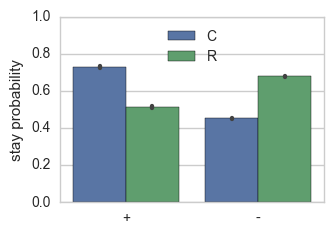

N=21
T_interval 0.2


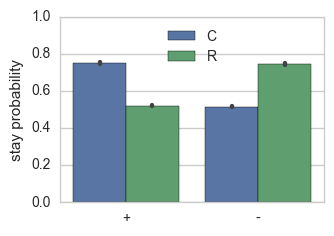

In [ ]:
import pylab

for v in vals:
    df_v = df2.query('%s==%g' % (param, v))
    print('N=%d' % (len(df_v)/4))
    print param, v
    pylab.figure(figsize=(3.5,2.5))
    seaborn.barplot('rewarded', 'stay', hue='rare', data=df_v, order=['+', '-'], hue_order=['C','R'])
    #pylab.title('%s: %g' %(name, v))
    pylab.ylim(0,1)
    pylab.legend(title='', loc='upper center')
    pylab.xlabel('')
    pylab.ylabel('stay probability')
    pylab.tight_layout()
    pylab.savefig('%s-%g.png' % (param, v), dpi=450)
    pylab.show()